# Lab10: Introduction to Disrete predictors and Logistic Regression

### Learning Outcomes
In this tutorial, we will learn how to use discrete variables as predictors, and as dependent variables (logistic regression). We will also use some of our previous skills (bootstrapping) to build distributions for the regression coefficients.
### Data set
I will be using the births dataset from Assignment 6. Briefly,
The dataset includes a random sample of 150 births from the birth records in the US state of North Carolina in 2004. The data contains 50 records from mothers that self-identified as having smoked on average more than 2 cigarettes per week during the pregnancy (smokers) and 100 mothers that smoked not at all or less than 2 cigarettes per week during the pregnancy.

The data frame has 150 observations with the following 9 variables:

- fAge: Father’s age.
- mAge: Mother’s age.
- weeks:  Weeks at which the mother gave birth.
- premature: Indicates whether the baby was premature or not.
- visits: Number of hospital visits.
- gained: Weight gained by mother (lbs)
- weight: Birth weight of the baby (lbs)
- sexBaby: Gender of the baby
- smoke:  Whether or not the mother self-reported to be a smoker.

<font color = 'red'> To do the assignment, use the lecture notes and the tutorial notebook!

### Preliminaries
Set up the environment by importing pandas, numpy, matplotlib, scipy.optimize interface.


In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as so
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('births.csv')

# Discrete Explanatory variables

## 1. Creating dummy variables for discrete variables
As you saw in the lecture notes, there are two ways of dummy coding. Here, we will be using one of those ways.

First step is to convert the discrete variables you want to use in regression to a dummy variable:
Let's consider smoke as the discreate variable we want to use in our model.

There are many ways to do it and you can come up with your own ways (or just google!). Here, I will be showing just one way of doing it.

The variable will be 1 where smoke is 'smoker' (the coded group) and 0 where smoke is 'nonsmoker' (the comparison group).
For the assignment, you need to put this dummy variable into a new column in the dataframe.<br>

### 1.1 Dummy variable for dirGender

In [8]:
smokeI = df['smoke'] == 'smoker'

print(smokeI)

smokeID = np.double(smokeI)

print(smokeID)

print(type(smokeI.dtype))
print(type(smokeID.dtype))

df['smokeI'] = smokeI
df['smokeID'] = smokeID
df.head()

0       True
1      False
2      False
3      False
4      False
       ...  
145    False
146     True
147    False
148    False
149    False
Name: smoke, Length: 150, dtype: bool
[1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 0.]
<class 'numpy.dtypes.BoolDType'>
<class 'numpy.dtypes.Float64DType'>


,fAge,mAge,weeks,premature,visits,gained,weight,sexBaby,smoke,smokeI,smokeID
0,31,30,39,full term,13,1,6.88,male,smoker,True,1.0
1,34,36,39,full term,5,35,7.69,male,nonsmoker,False,0.0
2,36,35,40,full term,12,29,8.88,male,nonsmoker,False,0.0
3,41,40,40,full term,13,30,9.00,female,nonsmoker,False,0.0
4,42,37,40,full term,0,10,7.94,male,nonsmoker,False,0.0


## 2. Doing multiple regression with discrete variables as predictors:
Now let's try to predict the birth weight from wether the mother was smoker or not.

You can use your multiple regression functions from previous assignments cause this is basically like the multiple regression you implemented in the previous assignment.

In [16]:
def multRegPredict(b,D,xname):
    yp=np.ones(len(D.index))*b[0]        # Intercept
    for i in range(len(xname)):
        yp=yp+D[xname[i]]*b[i+1]         # Add each regression value
    return yp

def multRegLossRSS(b,D,y,xname):
    predY = multRegPredict(b,D,xname)
    res = y-predY
    rss = sum(res**2)
    grad=np.zeros(len(b))
    grad[0]=-2*np.sum(res)
    for i in range(len(xname)):
        grad[i+1]=-2*np.sum(D[xname[i]]*res)
    return (rss,grad)

def multRegFit(D,y,xname):
    N=len(xname)
    b0=np.zeros((N+1,))
    RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)
    b=RES.x # Results
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,deriv = multRegLossRSS(b,D,y,xname)
    R2 = 1-RSS/TSS
    return (R2,b)

In [18]:
R2, b = multRegFit(df, df['weight'], ['smokeI'])
print(R2)
print(b)

0.022855729977791395
[ 7.1882 -0.4716]


In [19]:
R2, b = multRegFit(df, df['weight'], ['smokeID'])
print(R2)
print(b)

0.022855729977791395
[ 7.1882 -0.4716]


<font color = 'red'>You can use either of the two variables you just created! But the one for which dtype = float is preferrable

<font color = 'red'> Common mistakes:
    
* multRegFit takes a LIST as xname not a string, not a numpy array, not a series
* The type of second input to multRegFit is np.ndarray or Pandas Series object not a string
* the order of outputs is important: the function we have here returns R2 as the first output, and b as the second output

### 2.1 plot data and the regression line (Have different colors for males and females)

Text(0, 0.5, 'Birth Weight')

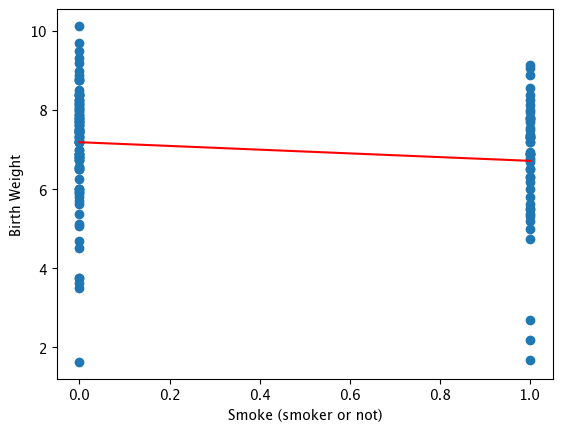

In [33]:
plt.scatter(df['smokeID'], df['weight'])

yp = multRegPredict(b, df, ['smokeID'])
plt.plot(df['smokeID'], yp, 'r-')
plt.xlabel('Smoke (smoker or not)')
plt.ylabel('Birth Weight')

### 2.2 Multiple regression with multiple discrete variables
Lets say we want to model birth weight as a function of 3 variables:
* wether the mother is smoker or not (smokerId)
* Weeks at which the mother gave birth (weeks)
* Number of hospital visits (visits)
Implement the following formula:

'weight ~ smokeId + visits + weeks'

Again, you can use your functions from previous assignment!

In [37]:
R2, b = multRegFit(df, df['weight'], ['smokeID', 'visits', 'weeks'])
print(R2)
print(b)

0.48627452602295573
[-6.45888975 -0.41670915  0.05480599  0.33731952]


### 2.3 some more plotting
Remember, you can always do a simple plot to get "an idea" of the relationship between variables. Just like we did in the previous assignments.

Lets say you want to plot the birth weight against weeks (Weeks at which the mother gave birth) with smokers and non-smokers colored differently.



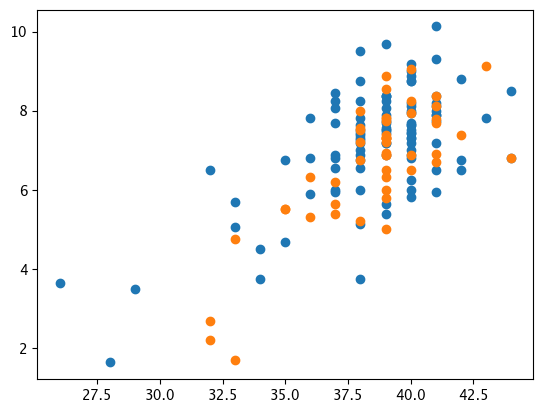

In [ ]:
# make categorical a legend ??

plt.scatter(df['weeks'].loc[df['smokeID'] == 0], df['weight'].loc[df['smokeID'] == 0])
plt.scatter(df['weeks'].loc[df['smokeID'] == 1], df['weight'].loc[df['smokeID'] == 1])

0.46878623949044973
[-6.63359745 -0.46801458  0.35854209]


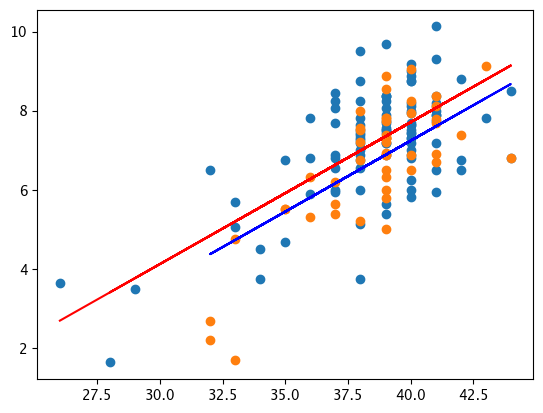

In [47]:
R2, b = multRegFit(df, df['weight'], ['smokeID', 'weeks'])
print(R2)
print(b)

yp = multRegPredict(b, df, ['smokeID', 'weeks'])

plt.scatter(df['weeks'].loc[df['smokeID'] == 0], df['weight'].loc[df['smokeID'] == 0])
plt.scatter(df['weeks'].loc[df['smokeID'] == 1], df['weight'].loc[df['smokeID'] == 1])

plt.plot(df['weeks'][df['smokeID'] == 1] , yp[df['smokeID'] == 1], 'b-')
plt.plot(df['weeks'][df['smokeID'] == 0] , yp[df['smokeID'] == 0], 'r-')

### 2.4 Interpreting regression coefficients (Slide 8 and 9)

What each regression coefficient mean? (the general approach to interpreting the regression coefficients)
with the smf.ols, I have used RSS as the loss function so Group __means__ are used in model fitting!

* using 1 and 0:
    * smoker coded as 1 (coded group)
    * non-smoker coded as 0 (comparison group)
Now lets plug in these variables into the regression formula:

\begin{align}
\ y & = \beta_0\ + \beta_1 x_1\\
\end{align}

1. __The variable has 1s for where the gender was 'female' and 0s for where the gender was 'male'.__
    * Lets see what happens for where the smoke is 'smoker' (smokerId = 1):
    \begin{align}
    \ y & = \beta_0\ + \beta_1 * 1\\
    \ y & = \beta_0\ + \beta_1\
    \end{align}
    * and what happens for where the smoke is 'nonsmoker' (smokerId = 0):
    \begin{align}
    \ y & = \beta_0\ + \beta_1 * 0\\
    \ y & = \beta_0\\
    \end{align}
    * How do you interpret the values of intercept and slope?
        * intercept will be the mean of the comparison group (what happens where gender is 'male'?)
        * slope will be:
        \begin{align}
        \beta_1\ & = \ y  - \beta_0\\
        \end{align}
        the value of the slope will be the difference between y (mean of smoker group) and mean of non-smokr group (the intercept)
        
Follow the same steps when you have multiple discrete explanatory variables to interpret each regression coefficient.

### 2.5 Making parametric inferences on the coefficients
I will write the code for bootstraping step by step (just as a practice). In my code, I will be using smf formula interface. You are free to use your functions from previous assignment!

I want to get the distributions for coefficients of the following regression model:

'weight ~ smokeId + visits + weeks'

In [48]:
def bootstrapReg(D,y,args,fitfcn=multRegFit,numIter=500):
    R2,b=fitfcn(D,y,args)
    numParams=len(b)
    N = len(D.index)
    ind  = np.arange(N)
    stats = np.zeros((numIter,numParams))
    for i in range(numIter):
        sample=np.random.choice(ind,N)
        R2,stats[i,:]=fitfcn(D.iloc[sample],y[sample],args)
    return stats

def confidenceInt(data,perc):
    tail = (100-perc)/2 # Weight on each tail
    Int=(np.percentile(data,tail),np.percentile(data,100-tail))
    return Int

In [66]:
B = bootstrapReg(df, df['weight'], ['smokeID', 'visits', 'weeks'], numIter = 100)

(array([ 5., 10., 12., 18., 16., 15., 13.,  7.,  0.,  4.]),
 array([0.24874314, 0.26830283, 0.28786252, 0.30742221, 0.32698189,
        0.34654158, 0.36610127, 0.38566096, 0.40522065, 0.42478033,
        0.44434002]),
 <BarContainer object of 10 artists>)

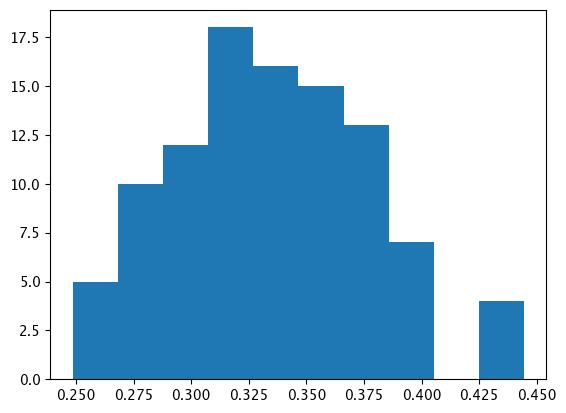

In [67]:
plt.hist(B[:, 3]) # 3 represents weeks

In [78]:
confidenceInt(B[:, 3], 0.95) # 0 = intercept, 1 = smokeID, 2 = visits, 3 = weeks

(np.float64(0.3316532721285558), np.float64(0.33179375246286785))

# Discrete Response variable
Lets say we are interested in doing predictions about wether the baby is premature or not.

First we need to create the dummy variable and put into the dataframe

In [79]:
df['premDummy'] = np.double(df['premature'] == 'full term')
df.head()

,fAge,mAge,weeks,premature,visits,gained,weight,sexBaby,smoke,smokeI,smokeID,premDummy
0,31,30,39,full term,13,1,6.88,male,smoker,True,1.0,1.0
1,34,36,39,full term,5,35,7.69,male,nonsmoker,False,0.0,1.0
2,36,35,40,full term,12,29,8.88,male,nonsmoker,False,0.0,1.0
3,41,40,40,full term,13,30,9.00,female,nonsmoker,False,0.0,1.0
4,42,37,40,full term,0,10,7.94,male,nonsmoker,False,0.0,1.0


## 1. Do a linear regression model
Model the dummy variable for premature as a linear function of birth weight. What do you see?

0.38517360434352665
[-0.16964759  0.14644398]


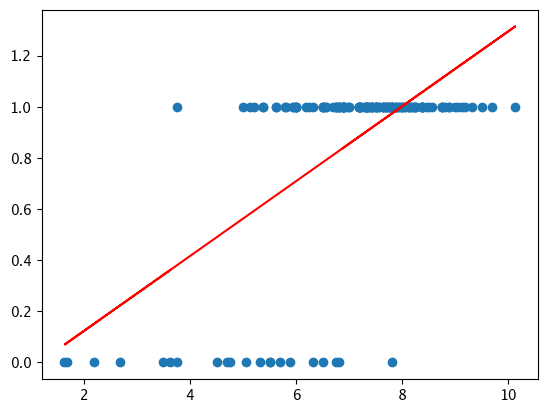

In [82]:
R2, b = multRegFit(df, df['premDummy'], ['weight'])
print(R2)
print(b)

yp1 = multRegPredict(b, df, ['weight'])

plt.scatter(df['weight'], df['premDummy'])
plt.plot(df['weight'], yp1, 'r-')


## 2. Logistic regression
Here, I will show you how to implement the logistic regression function (basically a logistic function).
With a discrete response variable, essentially, we want to predict the __probability__, a value between 0 and 1.


### 2.1 prediction function (slides 16)
pseudocode:
1. Write the code for a simple multiple regression prediction function (implementing the following formula):

$$
a_n  = b_0 + b_1 x_1 + b_2 x_2 + ...
$$

2. implement the following formula:

$$
p_n  = \ 1 \ / \ 1 + exp(a_n)
$$

    To implement this formula, you will need numpy exponential function (numpy.exp):<br>
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html

In [87]:
def logisticRegPredict(b, D, xname):
    an = np.ones(len(D.index))*b[0]

    for i in range(len(xname)):
        an = an + b[i + 1] * D[xname[i]]

    pn = 1/(1+np.exp(an))

    return pn 

### 2.2 Plot the logistic function
Here, we will create a dataframe with a single column (as an example) and use it to plot the logistic function

In [91]:
entries = np.linspace(-10, 10, num = 50)

Ef = pd.DataFrame(entries, columns = ["MyEntries"])

Ef.head()

,MyEntries
0,-10.000000
1,-9.591837
2,-9.183673
3,-8.775510
4,-8.367347


In [92]:
p = logisticRegPredict([-1, 1], Ef, ['MyEntries'])

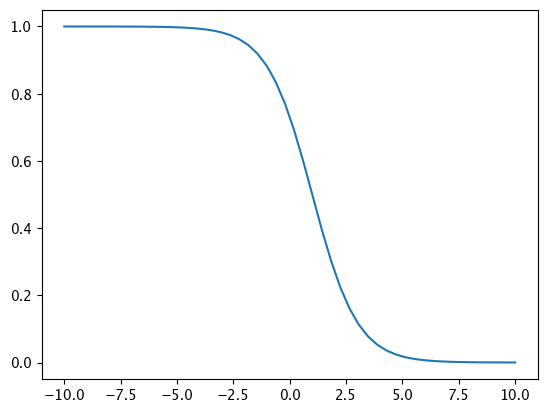

In [94]:
plt.plot(entries, p)

## 2.3 Logistic regression loss function

In [97]:
b = [-8, 1.5]

yp = logisticRegPredict(b, df, ['weight'])
y = df['premDummy']

A = y*np.log(p)
B = (1 - y)
C = np.log(1 - yp)

# initialize with the value for the intercept
grad = []
res = y - yp
grad.append(-sum(res))

# loop for the other
# for: ...
# grad[i+1] = np.sum(D[xname[i]])

grad

[-104.6562765225926]

## 2.4 optimize cost
use scipy.optimize.minimize as before

In [ ]:
# Res = so.optimize(logisticRegLoss, b0, args = (D, y, ['weight'], jac = True))

## 2.5 plot the predictions


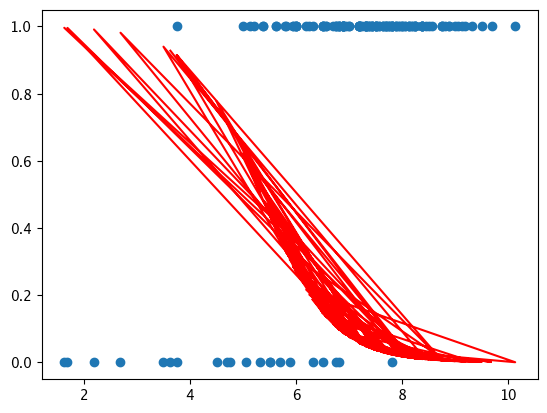

In [98]:
plt.scatter(df['weight'], df['premDummy'])

plt.plot(df['weight'], yp, 'r-')

## 2.6 The likelihood value
How to get the likelihood value from the output of smf,logit?

In [ ]:
# ll, b = logisticRegFit(D, D['premDummy'], ['weight'])

# use likelyhood to compute this. Use lectures to compute

whats the significgance of the 1 and 0 graph

did not understand 2.2 and 2.3